In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happinessdf = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1])
happinessdf.head()

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919

In [10]:
happinessdf.count()

Life Ladder                         1949
Log GDP per capita                  1913
Social support                      1936
Healthy life expectancy at birth    1894
Freedom to make life choices        1917
Generosity                          1860
Perceptions of corruption           1839
Positive affect                     1927
Negative affect                     1933
dtype: int64

In [3]:
#Happiest country and year
happinessdf['Life Ladder'].idxmax()

('Denmark', 2005)

In [4]:
happinessdf.loc['Denmark']['Life Ladder'].max()

8.01893424987793

In [5]:
#Average happiness of Denmark throughout the years 2005-2020
happinessdf.loc['Denmark']['Life Ladder'].mean()

7.680304718017578

In [6]:
#Least Happy country and year
happinessdf['Life Ladder'].idxmin()

('Afghanistan', 2019)

In [7]:
happinessdf.loc['Afghanistan']['Life Ladder'].min()

2.375091791152954

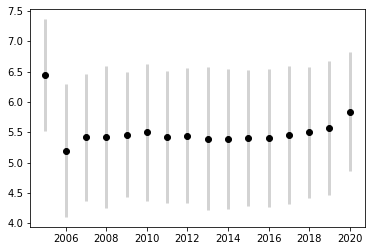

In [16]:
#mean happiness over the years
x = happinessdf.groupby('year').aggregate(np.mean)["Life Ladder"]
dy = happinessdf.groupby('year').aggregate(np.std)["Life Ladder"]

fig, ax = plt.subplots()

ax.errorbar(x.index, x.values, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

plt.show()

<AxesSubplot:>

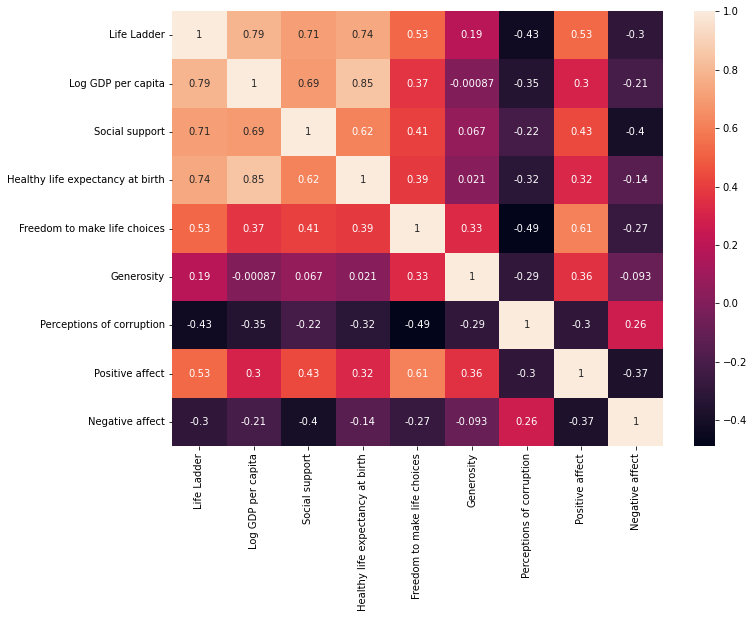

In [11]:
#Highest correlations are between 
# 1. GDP and Healthy Life Exp, Life Ladder, Social Support
# 2. Life Ladder and GDP, Social Support, Healthy Life Exp, Freedom, Positive affect
# 3. Social support and Healthy Life
# 4. Freedom to make life choices and Positive affect

fig, ax = plt.subplots(figsize=(11,8))
sns.heatmap(happinessdf.corr(method='pearson', min_periods=1), annot=True, ax=ax)

In [12]:
happinessdf.loc['Netherlands']

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2005,7.463979,10.813766,0.947358,70.400002,0.901008,NaN,0.571342,0.869353,0.232795
2007,7.451880,10.881042,0.943854,70.800003,0.896018,0.344347,0.445437,0.817750,0.213336
2008,7.631012,10.898621,0.944202,71.000000,0.883287,0.365200,0.418940,0.788195,0.181690
2010,7.501876,10.864328,0.956537,71.400002,0.921448,0.349346,0.398592,0.853234,0.206079
2011,7.563798,10.875057,0.938396,71.519997,0.925432,0.335668,0.359396,0.862723,0.181386
2012,7.470716,10.861000,0.938885,71.639999,0.877119,0.288119,0.433754,0.860641,0.226290
2013,7.406550,10.856749,0.924705,71.760002,0.918996,0.304530,0.504530,0.866824,0.235443
2014,7.321188,10.867284,0.908996,71.879997,0.910180,0.331311,0.456948,0.867766,0.220657
2015,7.324437,10.882255,0.879010,72.000000,0.903979,0.261447,0.411822,0.834134,0.202129


In [14]:
# Group each row by Country; For each different country name, present max, mean and min of column Life Ladder
happinessdf.groupby('Country name')['Life Ladder'].aggregate(['max', 'mean', 'min'])

,max,mean,min
Country name,,,
Afghanistan,4.758381,3.594628,2.375092
Albania,5.867422,5.019427,4.511101
Algeria,6.354898,5.389717,4.744627
Angola,5.589001,4.420299,3.794838
Argentina,6.775805,6.310166,5.792797
...,...,...,...
Venezuela,7.478455,6.019735,4.041115
Vietnam,5.767344,5.305872,5.022699
Yemen,4.809259,3.912124,2.982674


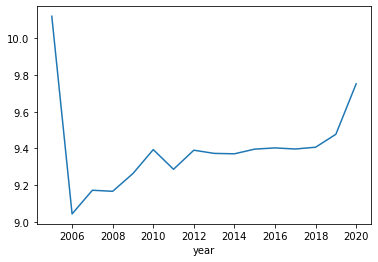

In [15]:
# GDP evolution from 2006 to 2007 
x = happinessdf.groupby('year').mean()['Log GDP per capita']
x.plot()
plt.show()

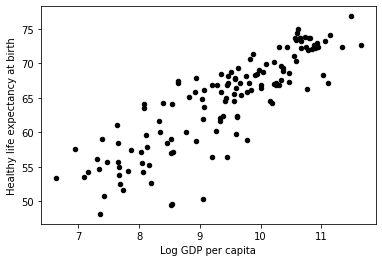

In [20]:
#relation between gdp and happiness

x = happinessdf.loc(axis=0)[:,2018][["Log GDP per capita","Healthy life expectancy at birth"]]
x.plot.scatter(x="Log GDP per capita", y="Healthy life expectancy at birth",c='black')
plt.show()

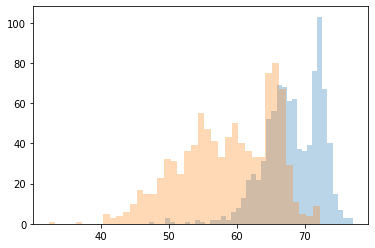

In [19]:
#the distribution of life expectancy in the top 50% happiest countries compare with the bottom 50%, considering all years

happy = happinessdf["Healthy life expectancy at birth"][happinessdf["Life Ladder"] > happinessdf["Life Ladder"].median()]
sad = happinessdf["Healthy life expectancy at birth"][happinessdf["Life Ladder"] <= happinessdf["Life Ladder"].median()]

x1 = happy.values
x2 = sad.values

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

plt.show()

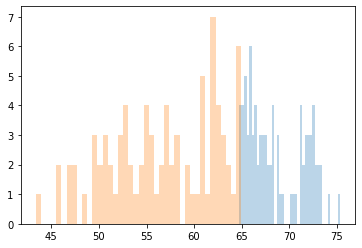

In [21]:
# Alternative way for above point

happy = happinessdf["Healthy life expectancy at birth"].groupby("Country name").mean().nlargest(83)
sad = happinessdf["Healthy life expectancy at birth"].groupby("Country name").mean().nsmallest(83)

x1 = happy.values
x2 = sad.values

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

plt.show()